In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [692]:
ewr = pd.read_csv('./data/merged/newark_merged.csv', index_col='Unnamed: 0')
ewr.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,...,Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%),clear_sky,yesterday,avg_last_week,last_week_median
2006-01-02 00:00:00,36.81,0.82,31.40,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1022.75,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 01:00:00,35.79,0.22,30.80,0.82,clear-night,NaN,0.0,0.0,NaN,1022.80,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 02:00:00,35.67,0.32,30.43,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 03:00:00,35.49,0.50,30.64,0.82,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 04:00:00,35.66,0.88,31.25,0.84,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.31,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0


In [693]:
ewr = ewr.drop(columns=["precipAccumulation", "precipType", "windGust", "icon", "summary", "ETR (Wh/m^2)", "ETRN (Wh/m^2)", "Dir Mod (Wh/m^2)", "Dif Mod (Wh/m^2)", "Glo Mod Unc (%)", "Dir Mod Unc (%)", "Dif Mod Unc (%)"])
ewr = ewr.dropna()

In [694]:
ewr.head()

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windSpeed,Glo Mod (Wh/m^2),clear_sky,yesterday,avg_last_week,last_week_median
2006-01-08 01:00:00,28.92,0.97,19.57,0.57,0.0,0.0,1014.84,33.02,0,10.0,192,4.31,0,0.0,0.0,0.0,0.0
2006-01-08 02:00:00,29.41,1.00,20.64,0.59,0.0,0.0,1014.74,33.27,0,10.0,195,4.13,0,0.0,0.0,0.0,0.0
2006-01-08 03:00:00,33.64,1.00,21.83,0.61,0.0,0.0,1014.69,33.64,0,10.0,196,2.80,0,0.0,0.0,0.0,0.0
2006-01-08 04:00:00,31.01,1.00,22.82,0.64,0.0,0.0,1014.35,33.85,0,10.0,205,3.31,0,0.0,0.0,0.0,0.0
2006-01-08 05:00:00,34.05,1.00,23.54,0.65,0.0,0.0,1014.37,34.05,0,10.0,212,2.75,0,0.0,0.0,0.0,0.0


## Some feature engineering

In [695]:
# ewr['clear_sky_transformed'] = np.exp(np.sqrt(ewr['clear_sky']))**(1/4)

## Simple Linear Regression

In [696]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

test_size = 0.2
random_state = 32
X_train, X_test, y_train, y_test = train_test_split(
    ewr.drop(columns=['Glo Mod (Wh/m^2)']), ewr['Glo Mod (Wh/m^2)'],
    test_size=test_size, random_state=random_state)

linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)

y_predict = linear_model.predict(X_test)
np.sqrt(mean_squared_error(y_predict, y_test))

93.45172722200918

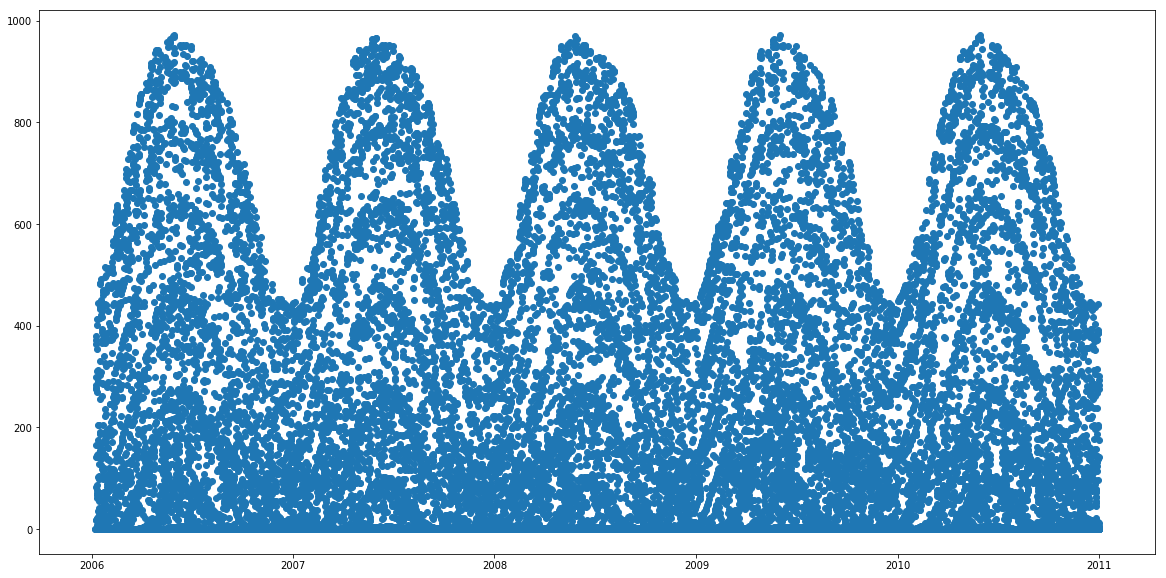

In [697]:
plt.figure(figsize=(20, 10))
plt.scatter(pd.to_datetime(y_train.index), y_train)

In [402]:
test_size = 0.2
random_state = 32

X = ewr.drop(columns=['Glo Mod (Wh/m^2)'])
y = ewr['Glo Mod (Wh/m^2)']
test_length = int(test_size*len(X))
X_train, X_test, y_train, y_test = X.iloc[0:-1*test_length], X.iloc[-1*test_length:], y[0:-1*test_length], y[-1*test_length:]

linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)

train_predicted = linear_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = linear_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))

train error: 93.01610904434402
test error: 97.67846932998971


In [403]:
pd.DataFrame({
    'feature': X_train.columns,
    'coef': linear_model.coef_})

,feature,coef
0,apparentTemperature,-0.875176
1,cloudCover,-66.775841
2,dewPoint,-5.016456
3,humidity,148.874426
4,precipIntensity,-66.025493
5,precipProbability,-30.629435
6,pressure,0.211836
7,temperature,6.058107
8,uvIndex,69.606894
9,visibility,1.764266


In [404]:
def get_daily(values, timestamps):
    df = pd.DataFrame(values)
    df['date'] = [pd.to_datetime(i).date() for i in timestamps]
    result = df.groupby('date').sum()
    result.columns = ['Total Energy (Wh/m)']
    return result

In [405]:
# See how the model fits the training dataset
train_energy = get_daily(y_train, y_train.index)
predicted_energy_train = get_daily(train_predicted, X_train.index)

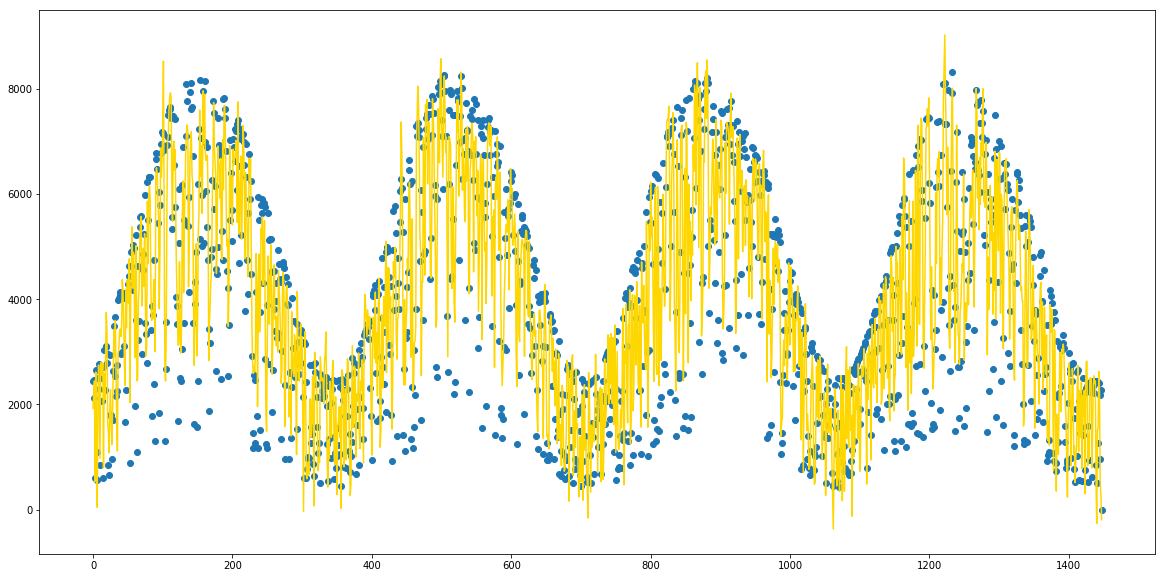

In [406]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(predicted_energy_train)), predicted_energy_train, c='gold')
plt.scatter(range(len(train_energy)), train_energy);

## Lasso

In [411]:
from sklearn.linear_model import LassoCV

random_state = 32
alphas = [100, 10, 1, 0.1, 0.001, 0.0001, 0.00001]
k_folds = 30
max_iter = 10000

lasso_model = LassoCV(cv=k_folds, alphas=alphas, random_state=random_state, max_iter=max_iter, n_jobs=-1, normalize=True)
lasso_model.fit(X_train, y_train)

print('alpha:', lasso_model.alpha_)

train_predicted = lasso_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = lasso_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))

alpha: 0.0001
train error: 93.01993298987863
test error: 97.66675117287113


In [412]:
pd.DataFrame({
    'feature': X_train.columns,
    'coef': lasso_model.coef_})

,feature,coef
0,apparentTemperature,-0.557606
1,cloudCover,-66.817584
2,dewPoint,-4.552766
3,humidity,125.791494
4,precipIntensity,-68.651261
5,precipProbability,-29.762721
6,pressure,0.200105
7,temperature,5.269946
8,uvIndex,69.507462
9,visibility,1.601474


## Ridge

In [413]:
from sklearn.linear_model import RidgeCV

random_state = 32
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
k_folds = 5

ridge_model = RidgeCV(cv=k_folds, alphas=alphas, normalize=True)
ridge_model.fit(X_train, y_train)

print('alpha:', ridge_model.alpha_)

train_predicted = ridge_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = ridge_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))

alpha: 0.0001
train error: 93.01662923584846
test error: 97.67356393763103


In [414]:
pd.DataFrame({
    'feature': X_train.columns,
    'coef': ridge_model.coef_})

,feature,coef
0,apparentTemperature,-0.773016
1,cloudCover,-66.780426
2,dewPoint,-4.821072
3,humidity,139.363549
4,precipIntensity,-67.266181
5,precipProbability,-30.288568
6,pressure,0.208847
7,temperature,5.761716
8,uvIndex,69.579675
9,visibility,1.702273


In [438]:
ts = pd.to_datetime(ewr.index)
day_of_year = [t.dayofyear for t in ts]

ewr['day_of_year'] = day_of_year
ewr['hour'] = [t.hour for t in ts]

## Feature Engineering

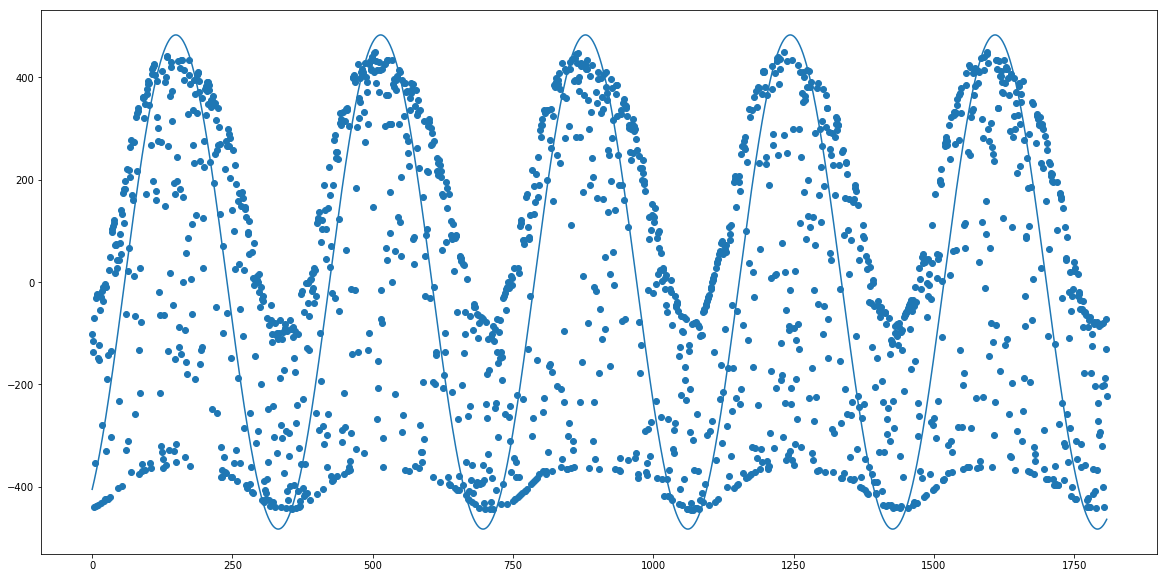

In [439]:
plt.figure(figsize=(20, 10))
all_noons = ewr[12::24]
plt.scatter(range(len(all_noons)), all_noons['Glo Mod (Wh/m^2)'] - np.mean(all_noons['Glo Mod (Wh/m^2)']))
x_axis = np.arange(len(all_noons))
theta_1 = np.max(all_noons['Glo Mod (Wh/m^2)']) / 2
cosine_funt =  theta_1 * np.cos((x_axis*(2*np.pi)/365) + 10)
plt.plot(x_axis, cosine_funt)
plt.show()

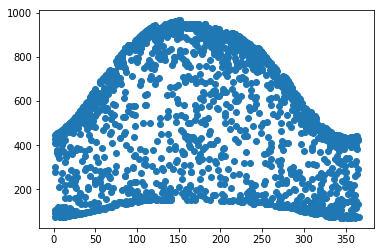

In [440]:
plt.scatter(all_noons['day_of_year'], all_noons['Glo Mod (Wh/m^2)'])

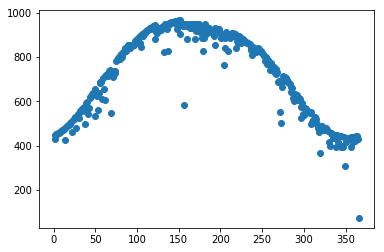

In [452]:
maxes = all_noons.groupby('day_of_year').max()['Glo Mod (Wh/m^2)']
plt.scatter(maxes.index, maxes)

In [453]:
from scipy import optimize


In [735]:
def sine_func(x, a, b, c, d):
    return a * np.sin(b * x - c) + d

def get_curve(df):
    maxes = df.groupby('day_of_year').max()['Glo Mod (Wh/m^2)']
    zeros = pd.DataFrame(maxes <= 0)
    maxes = maxes[maxes > 0]
    if len(maxes) == 0:
        return pd.Series(np.zeros(len(df)), index=df.index)
    params, params_covariance = optimize.curve_fit(test_func, maxes.index, maxes,
                                               p0=[max(maxes), 2*np.pi / 365, 0, np.mean(maxes)])
    result = sine_func(df['day_of_year'], params[0], params[1], params[2], params[3])
    return result
    


In [736]:
# def sine_func(x, a, b, c, d):
#     return a * np.sin(b * x - c) + d

# def add_zeros(row, zeros):
#     day = row['day_of_year']
#     if zeros[day]:
#         print('hi')
#         return 0
#     print('bye')
#     return row['curve']

# def get_curve(df):
#     maxes = df.groupby('day_of_year').max()['Glo Mod (Wh/m^2)']
#     zeros = maxes <= 0
#     print(zeros)
#     maxes = maxes[maxes > 0]
#     if len(maxes) == 0:
#         return pd.Series(np.zeros(len(df)), index=df.index)
#     params, params_covariance = optimize.curve_fit(test_func, maxes.index, maxes,
#                                                p0=[max(maxes), 2*np.pi / 365, 0, np.mean(maxes)])
#     result = pd.DataFrame({'curve': sine_func(df['day_of_year'], params[0], params[1], params[2], params[3])})
#     merged = df.merge(result, left_index=True, right_index=True)
#     print(merged.apply(lambda r: add_zeros(r, zeros), axis=1))
#     return result
    


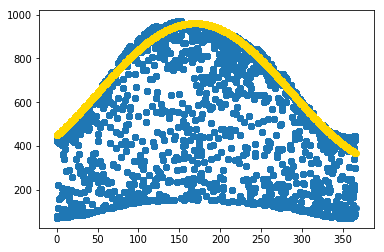

In [737]:
plt.scatter(all_noons['day_of_year'], all_noons['Glo Mod (Wh/m^2)'])
plt.scatter(all_noons['day_of_year'], get_curve(all_noons), c='gold')

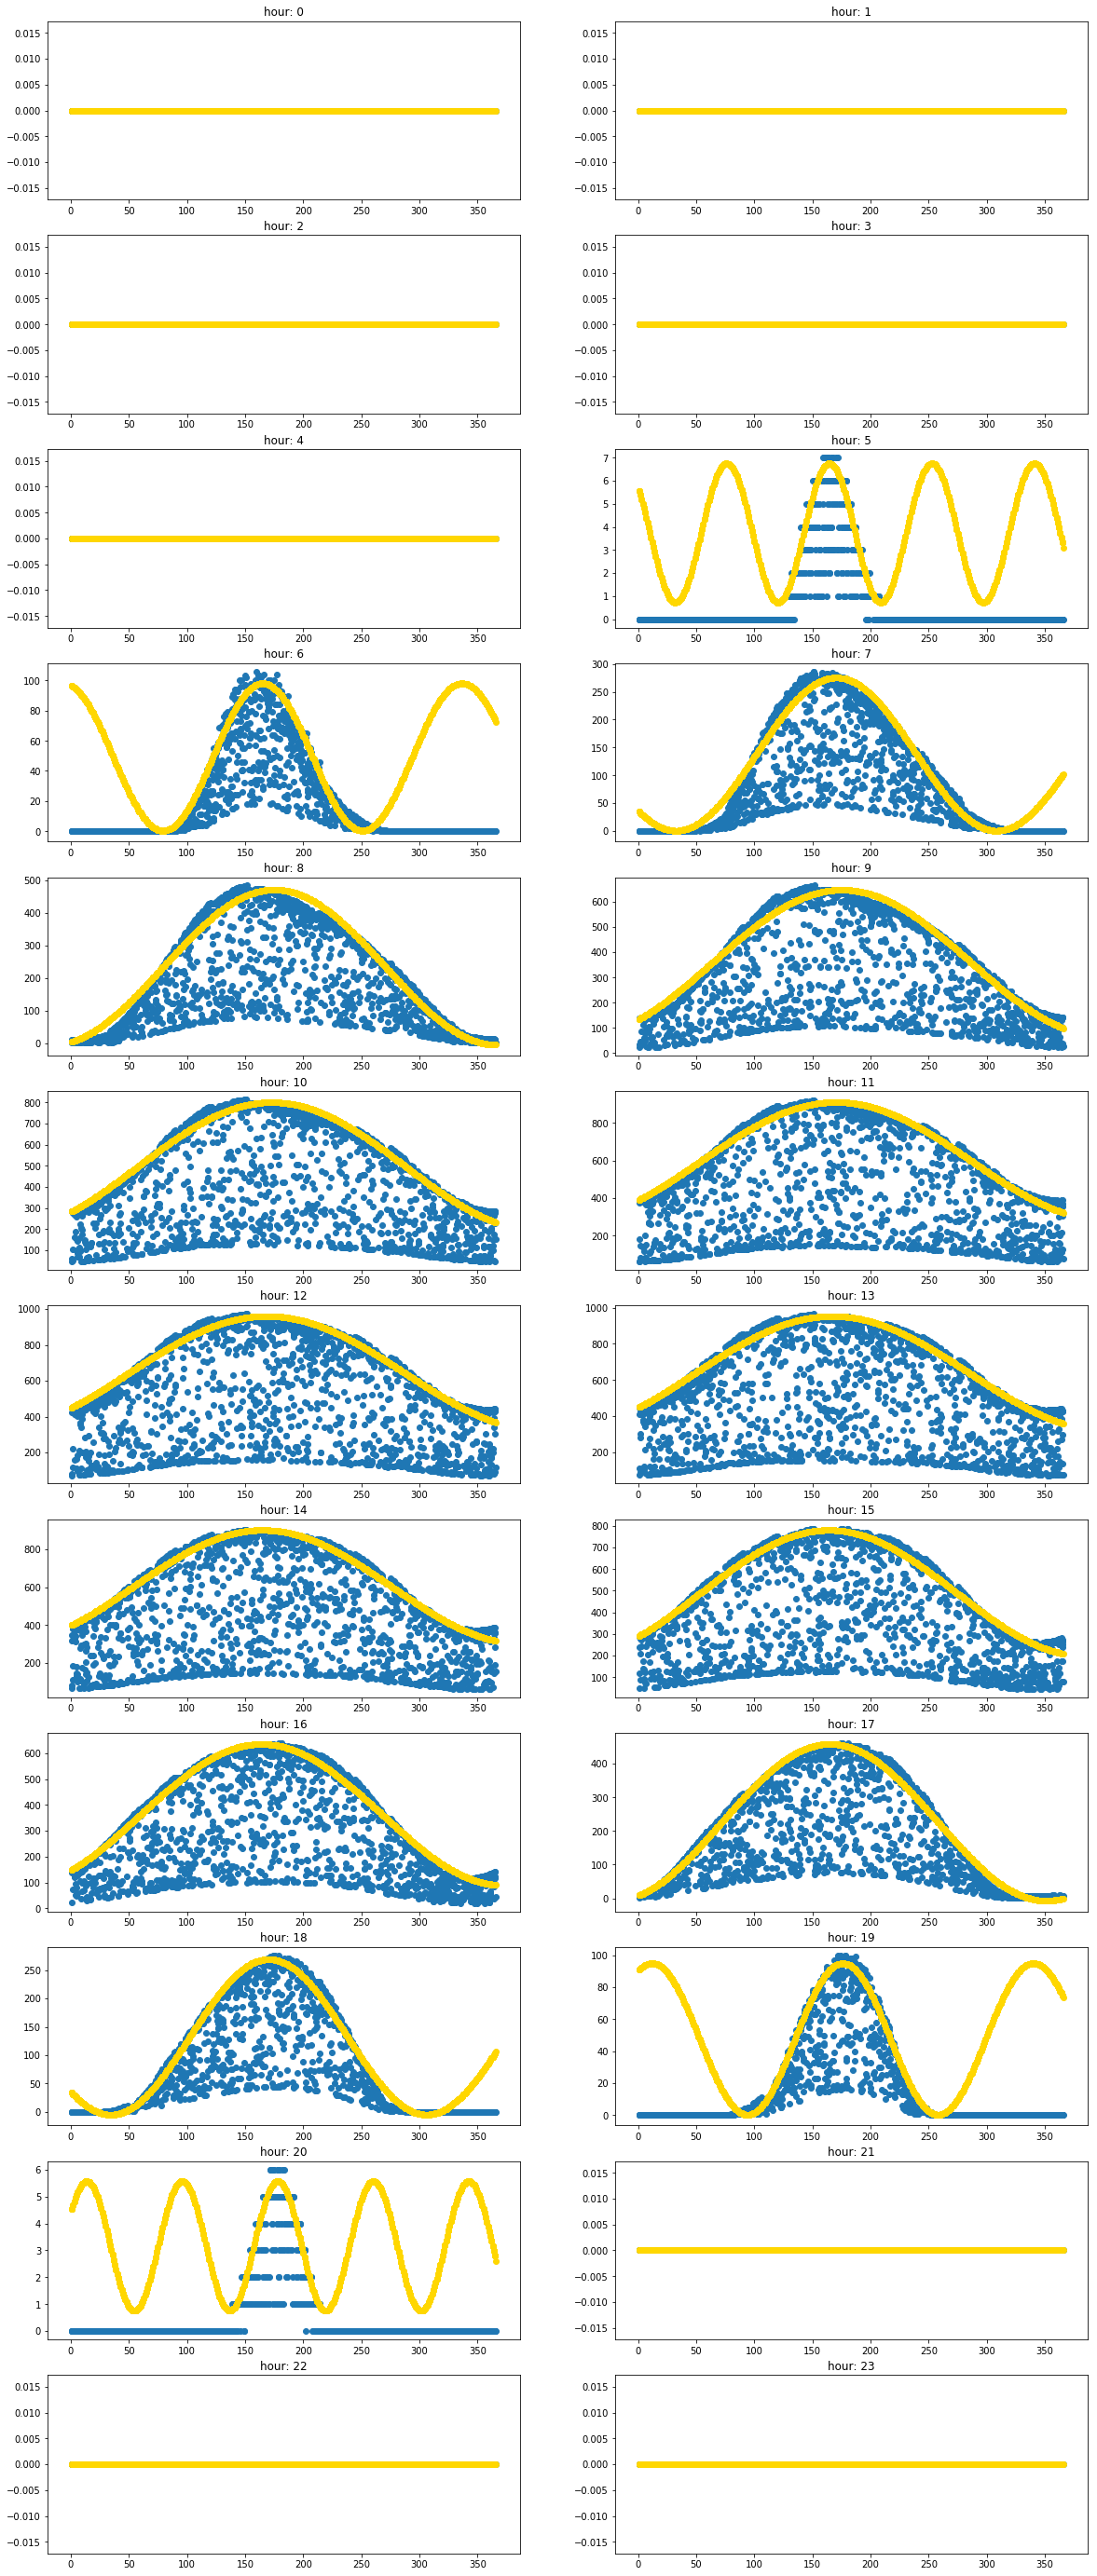

In [684]:
plt.figure(figsize=(20, 50))
result = pd.Series()
for i in range(24):
    all_hours = ewr[ewr['hour'] == i]    
    plt.subplot(12, 2, i + 1)
    plt.scatter(all_hours['day_of_year'], all_hours['Glo Mod (Wh/m^2)'])
    curve = get_curve(all_hours)
    result = pd.concat([result, curve])
    plt.scatter(all_hours['day_of_year'], curve, c='gold')
    plt.title('hour: ' + str(i))

In [685]:
result.head()

2006-01-09 00:00:00    0.0
2006-01-10 00:00:00    0.0
2006-01-11 00:00:00    0.0
2006-01-12 00:00:00    0.0
2006-01-13 00:00:00    0.0
dtype: float64

In [698]:
ewr.head()

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windSpeed,Glo Mod (Wh/m^2),clear_sky,yesterday,avg_last_week,last_week_median
2006-01-08 01:00:00,28.92,0.97,19.57,0.57,0.0,0.0,1014.84,33.02,0,10.0,192,4.31,0,0.0,0.0,0.0,0.0
2006-01-08 02:00:00,29.41,1.00,20.64,0.59,0.0,0.0,1014.74,33.27,0,10.0,195,4.13,0,0.0,0.0,0.0,0.0
2006-01-08 03:00:00,33.64,1.00,21.83,0.61,0.0,0.0,1014.69,33.64,0,10.0,196,2.80,0,0.0,0.0,0.0,0.0
2006-01-08 04:00:00,31.01,1.00,22.82,0.64,0.0,0.0,1014.35,33.85,0,10.0,205,3.31,0,0.0,0.0,0.0,0.0
2006-01-08 05:00:00,34.05,1.00,23.54,0.65,0.0,0.0,1014.37,34.05,0,10.0,212,2.75,0,0.0,0.0,0.0,0.0


In [699]:
merged = ewr.merge(pd.DataFrame(result), left_index=True, right_index=True)

In [700]:
with_curve = merged.rename(columns = {0: 'transformed_time_3'})


In [701]:
with_curve

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windSpeed,Glo Mod (Wh/m^2),clear_sky,yesterday,avg_last_week,last_week_median,transformed_time_3
2006-01-08 01:00:00,28.92,0.97,19.57,0.57,0.0000,0.00,1014.84,33.02,0,10.00,192,4.31,0,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 02:00:00,29.41,1.00,20.64,0.59,0.0000,0.00,1014.74,33.27,0,10.00,195,4.13,0,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 03:00:00,33.64,1.00,21.83,0.61,0.0000,0.00,1014.69,33.64,0,10.00,196,2.80,0,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 04:00:00,31.01,1.00,22.82,0.64,0.0000,0.00,1014.35,33.85,0,10.00,205,3.31,0,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 05:00:00,34.05,1.00,23.54,0.65,0.0000,0.00,1014.37,34.05,0,10.00,212,2.75,0,0.000000,0.0,0.000000,0.0,4.189444
2006-01-08 06:00:00,31.69,1.00,24.09,0.66,0.0000,0.00,1014.89,34.21,0,10.00,226,3.09,0,0.000000,0.0,0.000000,0.0,91.482970
2006-01-08 07:00:00,30.93,1.00,24.81,0.68,0.0000,0.00,1015.65,34.10,0,9.65,240,3.62,0,0.000000,0.0,0.000000,0.0,21.257433
2006-01-08 08:00:00,31.46,1.00,25.46,0.70,0.0000,0.00,1016.60,34.20,0,10.00,240,3.27,12,250.182363,12.0,9.857143,12.0,15.247934
2006-01-08 09:00:00,31.94,0.41,26.02,0.69,0.0000,0.00,1017.52,35.30,0,10.00,244,3.95,142,682.064957,137.0,114.000000,137.0,154.580857
2006-01-08 10:00:00,33.58,0.12,26.14,0.62,0.0000,0.00,1018.48,37.78,1,10.00,275,5.36,277,829.973565,279.0,192.857143,201.0,305.069649


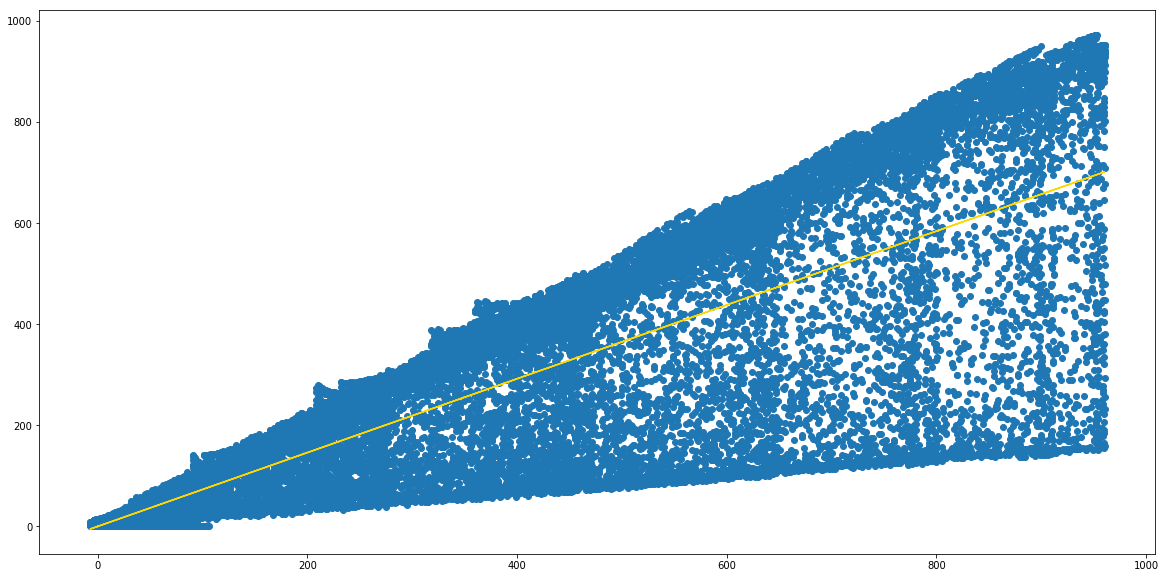

In [702]:
plt.figure(figsize=(20,10))
plt.scatter(with_curve['transformed_time_3'], with_curve['Glo Mod (Wh/m^2)']);
plt.plot(with_curve['transformed_time_3'], 0.73*with_curve['transformed_time_3'], c='gold')

In [703]:
ewr.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'uvIndex', 'visibility', 'windBearing', 'windSpeed', 'Glo Mod (Wh/m^2)',
       'clear_sky', 'yesterday', 'avg_last_week', 'last_week_median'],
      dtype='object')

In [704]:
ewr['transformed_time'] = with_curve['transformed_time_3']

## Simple Linear Regression

In [742]:
test_size = 0.2
random_state = 32
X_train, X_test, y_train, y_test = train_test_split(
    ewr.drop(columns=['Glo Mod (Wh/m^2)']), ewr['Glo Mod (Wh/m^2)'],
    test_size=test_size, random_state=random_state)

linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)

train_predicted = linear_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = linear_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))


train error: 94.04961589960288
test error: 93.45113995668132


## Lasso Again!

In [705]:
# ewr['transformed_time'] = np.sqrt(new_feature)**(1.5)
# ewr['clear_sky_transformed'] = np.exp(np.sqrt(ewr['clear_sky']))**(1/4)

In [706]:
test_size = 0.2
random_state = 32

X = ewr.drop(columns=['Glo Mod (Wh/m^2)'])
y = ewr['Glo Mod (Wh/m^2)']
test_length = int(test_size*len(X))
X_train, X_test, y_train, y_test = X.iloc[0:-1*test_length], X.iloc[-1*test_length:], y[0:-1*test_length], y[-1*test_length:]
random_state = 32
alphas = [100, 10, 1, 0.1, 0.001, 0.0001]
k_folds = 5
max_iter = 10000

lasso_model = LassoCV(cv=k_folds, alphas=alphas, random_state=random_state, max_iter=max_iter, n_jobs=-1, normalize=True)
lasso_model.fit(X_train, y_train)

print('alpha:', lasso_model.alpha_)

train_predicted = lasso_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = lasso_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))

alpha: 0.0001
train error: 93.01965811725543
test error: 97.66731439511804


In [707]:
pd.DataFrame({
    'feature': X_train.columns,
    'coef': lasso_model.coef_})

,feature,coef
0,apparentTemperature,-0.558943
1,cloudCover,-66.864749
2,dewPoint,-4.561948
3,humidity,126.192400
4,precipIntensity,-68.627615
5,precipProbability,-29.777531
6,pressure,0.200915
7,temperature,5.280538
8,uvIndex,69.406703
9,visibility,1.602311


In [708]:
X_train

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windSpeed,clear_sky,yesterday,avg_last_week,last_week_median,transformed_time
2006-01-08 01:00:00,28.92,0.97,19.57,0.57,0.0000,0.00,1014.84,33.02,0,10.00,192,4.31,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 02:00:00,29.41,1.00,20.64,0.59,0.0000,0.00,1014.74,33.27,0,10.00,195,4.13,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 03:00:00,33.64,1.00,21.83,0.61,0.0000,0.00,1014.69,33.64,0,10.00,196,2.80,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 04:00:00,31.01,1.00,22.82,0.64,0.0000,0.00,1014.35,33.85,0,10.00,205,3.31,0.000000,0.0,0.000000,0.0,0.000000
2006-01-08 05:00:00,34.05,1.00,23.54,0.65,0.0000,0.00,1014.37,34.05,0,10.00,212,2.75,0.000000,0.0,0.000000,0.0,4.189444
2006-01-08 06:00:00,31.69,1.00,24.09,0.66,0.0000,0.00,1014.89,34.21,0,10.00,226,3.09,0.000000,0.0,0.000000,0.0,91.482970
2006-01-08 07:00:00,30.93,1.00,24.81,0.68,0.0000,0.00,1015.65,34.10,0,9.65,240,3.62,0.000000,0.0,0.000000,0.0,21.257433
2006-01-08 08:00:00,31.46,1.00,25.46,0.70,0.0000,0.00,1016.60,34.20,0,10.00,240,3.27,250.182363,12.0,9.857143,12.0,15.247934
2006-01-08 09:00:00,31.94,0.41,26.02,0.69,0.0000,0.00,1017.52,35.30,0,10.00,244,3.95,682.064957,137.0,114.000000,137.0,154.580857
2006-01-08 10:00:00,33.58,0.12,26.14,0.62,0.0000,0.00,1018.48,37.78,1,10.00,275,5.36,829.973565,279.0,192.857143,201.0,305.069649


## Ridge

In [709]:
from sklearn.linear_model import RidgeCV

random_state = 32
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
k_folds = 5

ridge_model = RidgeCV(cv=k_folds, alphas=alphas, normalize=True)
ridge_model.fit(X_train, y_train)

print('alpha:', ridge_model.alpha_)

train_predicted = ridge_model.predict(X_train)
print('train error:', np.sqrt(mean_squared_error(train_predicted, y_train)))

y_predict = ridge_model.predict(X_test)
print('test error:', np.sqrt(mean_squared_error(y_predict, y_test)))

alpha: 0.0001
train error: 93.01605363011835
test error: 97.67583215685869
